In [80]:
# Importamos las librerias
import tweepy
import datetime
import numpy as np
import pandas as pd
from random import randint
import json

# Agregamos los keys developer de twitter

In [81]:

API_KEY = "BxY952USdAR9ojsF4wqrAe5dO"
API_SECRET_KEY = "WUVjbbdOIKjbxisInrFQfHcJE4FfvXRxC6qyg1NazYY7mJ70BL"
ACCES_TOKEN = "328833715-b1q3B1CDfLndtubdxcusNglLxrcWx2ygsrqxLAvI"
ACCES_TOKEN_SECRET = "mdyuPkxcUW9v5JDkzKwErzdLaF7Mocgd4A6i41CJNlbMo"

# Creamos la conexion con twitter
auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCES_TOKEN, ACCES_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# Establecemos los usuarios de donde se va ha sacar la informacion

In [82]:

MAX_TWWETS = 1000
FECHA_INICIO = datetime.datetime(2021, 1, 1, 00, 00, 00)
datos_usuarios = [{'nombre': 'Teleamazonas', 'usuario': 'teleamazonasec'},
               {'nombre': 'Ecuavisa', 'usuario': 'ecuavisa'}]

# Obtenemos los tweets 

In [83]:

DATOS_REDES_SOCIALES = []

for juntaVacuna in datos_usuarios:
    tweets = tweepy.Cursor(api.user_timeline,q="Fausto Molina", id=juntaVacuna['usuario'], 
                            result_type="recent", include_rts=False).items(MAX_TWWETS)
    for tweet in tweets:
        fecha_creacion = tweet.created_at
        if fecha_creacion >= FECHA_INICIO:
            registro = {**juntaVacuna}
            registro['fecha_creacion'] = fecha_creacion
            registro['retweets'] = tweet.retweet_count
            registro['favoritos'] = tweet.favorite_count
            DATOS_REDES_SOCIALES.append(registro)
        else:
            break

# pasamos los datos a un dataset

In [84]:

dataset = pd.DataFrame(DATOS_REDES_SOCIALES)
dataset.head()

,nombre,usuario,fecha_creacion,retweets,favoritos
0,Teleamazonas,teleamazonasec,2021-06-07 02:35:00,3,23
1,Teleamazonas,teleamazonasec,2021-06-07 02:00:00,5,11
2,Teleamazonas,teleamazonasec,2021-06-07 01:30:00,0,5
3,Teleamazonas,teleamazonasec,2021-06-07 01:00:01,0,11
4,Teleamazonas,teleamazonasec,2021-06-07 00:30:00,0,6


In [85]:
# Guardamos el dataset
dataset.to_csv (r'datos_tweets_recintos.csv', index=False, header=True)

# Realizamos la conversion de los datos

In [86]:

dataset['numero_dia'] = dataset['fecha_creacion'].map(lambda x: (x - FECHA_INICIO).days)
dataset['numero_reacciones'] = dataset['favoritos'] +  dataset['retweets']
dataset = dataset.sort_values(by='numero_dia')
dataset.head()

,nombre,usuario,fecha_creacion,retweets,favoritos,numero_dia,numero_reacciones
1999,Ecuavisa,ecuavisa,2021-05-06 00:37:43,16,51,125,67
1998,Ecuavisa,ecuavisa,2021-05-06 00:43:57,15,34,125,49
1967,Ecuavisa,ecuavisa,2021-05-06 23:32:44,2,26,125,28
1968,Ecuavisa,ecuavisa,2021-05-06 23:30:04,9,20,125,29
1969,Ecuavisa,ecuavisa,2021-05-06 22:30:03,2,8,125,10


# APLICACION DE  REGRESION LINEAL

In [87]:

# importamos las librerias
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.ticker import NullFormatter

# Agregamos un fila de total casos nuevos

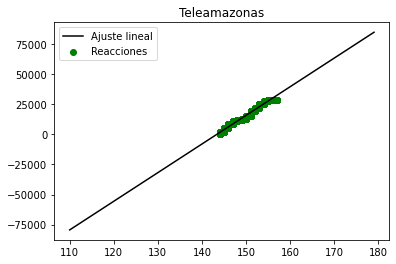

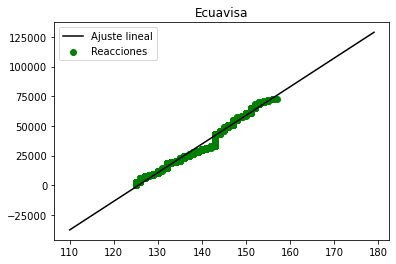

In [96]:

def obtener_total_reacciones(valores):
    total_reacciones = []
    for i, valor in enumerate(valores):
        if i > 0:
            nuevo_valor = total_reacciones[i-1] + valor
        else:
            nuevo_valor = valor
        total_reacciones.append(nuevo_valor)
    # retornamos la nueva lista
    return total_reacciones

dimension = len(datos_usuarios) if len(datos_usuarios) % 2 == 0 else len(datos_usuarios) + 1

conunt_axs = 0
actual_axs = 0

# recorre los datos de los datos_usuarios
for i, juntaVacuna in enumerate(datos_usuarios):
    
    # Obtiene los datos del juntaVacuna
    datos_juntaVacuna = dataset[dataset['usuario'].isin([juntaVacuna['usuario']])]
    
    # Obtiene las entradas
    x = list(datos_juntaVacuna['numero_dia']) # Fecha
    y = obtener_total_reacciones(datos_juntaVacuna['numero_reacciones']) # Numero de reacciones

    # Creamos el objeto de Regresión Lineal
    regresion = linear_model.LinearRegression()
    
    # Entrenamos nuestro modelo
    regresion.fit(np.array(x).reshape(-1, 1), y)
    x_real = np.array(range(110, 180))
    noVacunado=5
    # Dibujamos la distribucion y pedicion de los datos
    plt.title(juntaVacuna['nombre'])
    plt.scatter(x, y, lw=1.0, color = 'green')

    plt.plot(x_real, regresion.predict(abs(x_real.reshape(-1, 1))), color = 'black')
    plt.legend(('Ajuste lineal', 'Reacciones'))
    plt.show()
    # Actualiza los conts
    if (i + 1) % 2 == 0:
        conunt_axs += 1
        actual_axs = 0
    else:
        actual_axs += 1
        
    
# muestra las imagenes de la regresion
#plt.show()

# APLICACION DE LA SIMULACION

In [89]:
# Importamos las librerias
import random
import simpy

In [90]:
RANDOM_SEED = 42
NUMERO_VOTANTES = 4  # Numero promedio de personas para vacunar que llegan al mismo tiempo
NUMERO_MESAS = 2     # Numero de mesas receptoras disponibles en el recinto
TIEMPO_VOTACION = randint(5,10)  # Tiempo promedio que las personas se demoran en vacunar
TIEMPO_LEGADA = 7    # Tiempo promedio de la llegada de las personas
SIM_TIME = 100     # Simulation time in minutes

In [91]:
TIEMPOS = []

In [97]:
class Recinto(object):
    """
        Clase recinto, encargado del proceso de vacunacion 
    """
    def __init__(self, env, numero_mesas, tiempo_votacion):
        self.env = env
        self.tiempo_votacion = tiempo_votacion
        self.mesas_electorales = simpy.Resource(env, numero_mesas)

    def votacion(self, vacunado):
        """
            Realiza el proceso de vacunacion.
        """
        yield self.env.timeout(self.tiempo_votacion)
        self.segunda_dosis()
        # Espera la entrega del certificado
        timepo_cetificado = random.expovariate(1.0 / self.tiempo_votacion)
        yield env.timeout(timepo_cetificado)
        print(f'{vacunado} recibe su certificado votación a las {env.now}')
    
    def segunda_dosis(self):
        
        """
            Realiza el proceso de la segunda dosis 
        """
        pass
        
        
def vacunado(env, name, recinto):
    """
        Metodo donde el vacunado hace uso de una mesa electoral y
        procede con la vocunacion
    """
    print(f'{name} llega a la mesa electoral y hace fila a las {env.now}')
    with recinto.mesas_electorales.request() as mesa:
        yield mesa

        print(f'{name} entra al proceso de vacunacion a las {env.now}.')
        
        yield env.process(recinto.votacion(name))
        print(f'{name} sale del recinto electoral a las {env.now}.')

def agregar_vacunados(tiempo, vacunados):
    cantidad = 0
    if len(TIEMPOS):
        cantidad = TIEMPOS[-1].get('cantidad')
    # Agrega los nuevos vacunados
    TIEMPOS.append({'tiempo': tiempo, 'cantidad': cantidad + vacunados})
    
def setup(env, num_mesas, time_votacion, time_llegada):
    """
        Creacion del recinto electoral, y el generado aleatorio 
        de personas que van a vacunar
    """
    # Crea el recinto electoral
    recinto = Recinto(env, num_mesas, time_votacion)
    # Create el ingreso de vacunados a las mesas
    numero = 0
    while True:
        numero += 1
        vacunados = random.randint(1, NUMERO_VOTANTES)
        # Crea un numero randomico de vacunados
        for i in range(vacunados):
            env.process(vacunado(env, f'PER[{numero}.{i+1}]', recinto))
        # Agrega el numero de botantes
        agregar_vacunados(env.now, vacunados)
        # Espera el tiempo de llegada
        yield env.timeout(random.randint(time_llegada - 5, time_llegada + 5))

In [93]:
print('VACUNACION  - RECINTO FAUSTO MUNOZ')
random.seed(RANDOM_SEED)
env = simpy.Environment()
env.process(setup(env, NUMERO_MESAS, TIEMPO_VOTACION, TIEMPO_LEGADA))
# Execute!
env.run(until=SIM_TIME)

VACUNACION  - RECINTO FAUSTO MUNOZ
PER[1.1] llega a la mesa electoral y hace fila a las 0
PER[1.1] entra al proceso de vacunacion a las 0.
PER[2.1] llega a la mesa electoral y hace fila a las 2
PER[2.2] llega a la mesa electoral y hace fila a las 2
PER[2.3] llega a la mesa electoral y hace fila a las 2
PER[2.1] entra al proceso de vacunacion a las 2.
PER[3.1] llega a la mesa electoral y hace fila a las 7
PER[3.2] llega a la mesa electoral y hace fila a las 7
PER[4.1] llega a la mesa electoral y hace fila a las 11
PER[2.1] recibe su certificado votación a las 17.48046159396491
PER[2.1] sale del recinto electoral a las 17.48046159396491.
PER[2.2] entra al proceso de vacunacion a las 17.48046159396491.
PER[5.1] llega a la mesa electoral y hace fila a las 22
PER[1.1] recibe su certificado votación a las 23.33592672808083
PER[1.1] sale del recinto electoral a las 23.33592672808083.
PER[2.3] entra al proceso de vacunacion a las 23.33592672808083.
PER[6.1] llega a la mesa electoral y hace fil

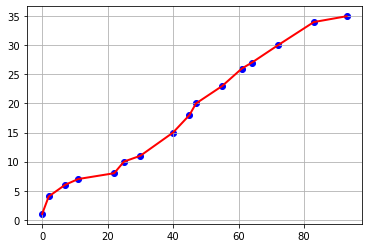

In [98]:
tiempos = pd.DataFrame(TIEMPOS)
plt.plot(tiempos['tiempo'], tiempos['cantidad'], linewidth=2,color='red')
plt.scatter(tiempos['tiempo'], tiempos['cantidad'], color='blue')
plt.grid(True)
plt.show()

In [99]:
# IMPRESION DE RESULTADOS
print("TOTAL VACUNADOS:",  TIEMPOS[-1]['cantidad'])
print("TIEMPO PROMEDIO ESPERA:",  tiempos['tiempo'].mean())
print("PERSONAS NO VACUNADAS",noVacunado)

TOTAL VACUNADOS: 35
TIEMPO PROMEDIO ESPERA: 41.0625
PERSONAS NO VACUNADAS 5
